<a href="https://colab.research.google.com/github/Kuzay3t/CNNwMNIST/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [64]:
import matplotlib.pyplot as plt

In [65]:
x_train.shape

(60000, 28, 28)

In [66]:
x_test.shape

(10000, 28, 28)

In [67]:
single_image = x_train[0]
#plt.imshow(single_image, cmap='gray')
#plt.show()

In [68]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [69]:
image2 = x_train[4]
print(image2)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [70]:
single_image.shape

(28, 28)

In [71]:
single_image.max()

np.uint8(255)

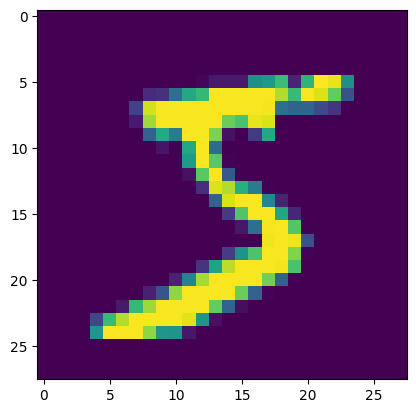

In [72]:
plt.imshow(single_image)

In [73]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [74]:
y_train.shape

(60000,)

In [75]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [76]:
y_test.shape

(10000,)

In [77]:
y_cat_train = to_categorical(y_train)

In [78]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [79]:
y_cat_test = to_categorical(y_test)

In [80]:
y_cat_test.shape

(10000, 10)

In [81]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [82]:
# normalize the data

x_train = x_train / 255
x_test = x_test / 255

In [83]:
x_train[0].max()

np.float64(1.0)

**Building the Model**

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D

In [85]:
the_model = Sequential()

In [86]:
the_model = Sequential()

the_model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))

the_model.add(MaxPool2D(pool_size = (2,2)))

the_model.add(Flatten())

the_model.add(Dense(128, activation = 'relu'))

the_model.add(Dense(10, activation = 'softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
the_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [89]:
the_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Training the Model**

In [90]:
the_model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_test, y_cat_test), callbacks= [early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9207 - loss: 0.2633 - val_accuracy: 0.9822 - val_loss: 0.0520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9844 - loss: 0.0486 - val_accuracy: 0.9849 - val_loss: 0.0455
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.9906 - loss: 0.0279 - val_accuracy: 0.9861 - val_loss: 0.0445
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9868 - val_loss: 0.0401
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9878 - val_loss: 0.0411
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9868 - val_loss: 0.0492


In [91]:
the_model.metrics_names

['loss', 'compile_metrics']

In [92]:
losses = pd.DataFrame(the_model.history.history)

In [93]:
losses

,accuracy,loss,val_accuracy,val_loss
0,0.960950,0.131239,0.9822,0.052011
1,0.985950,0.046135,0.9849,0.045488
2,0.990217,0.030404,0.9861,0.044489
3,0.993783,0.019196,0.9868,0.040121
4,0.995367,0.014277,0.9878,0.041097
5,0.996717,0.009590,0.9868,0.049238


<Axes: >

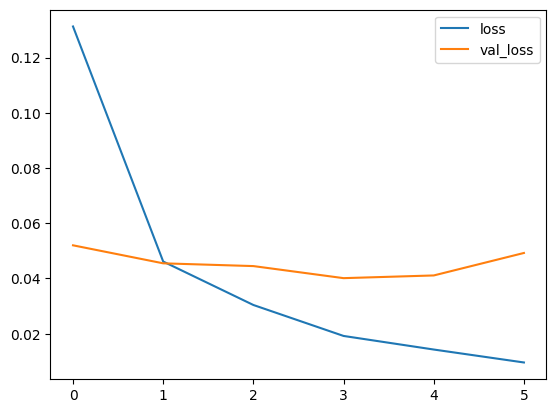

In [94]:
losses[['loss', 'val_loss']].plot()

In [95]:
losses[['accuracy', 'val_accuracy']].plot

In [96]:
the_model.metrics_names

['loss', 'compile_metrics']

In [97]:
the_model.evaluate(x_test, y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9825 - loss: 0.0654


[0.049237653613090515, 0.9868000149726868]

In [98]:
y_test_pred = the_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [99]:
y_test_pred.shape

(10000, 10)

In [100]:
y_test_pred[0]

array([8.3047888e-11, 1.1745027e-10, 1.1509519e-09, 6.9174085e-08,
       3.7716943e-10, 2.2355306e-12, 9.3311896e-17, 9.9999946e-01,
       1.0879782e-08, 3.0192453e-07], dtype=float32)

In [101]:
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

In [102]:
y_test_pred_classes.shape

(10000,)

In [103]:
y_test_pred_classes[0]

np.int64(7)

In [104]:
print(classification_report(y_test, y_test_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [105]:
confusion_matrix(y_test, y_test_pred_classes)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1132,    0,    1,    0,    0,    0,    0,    2,    0],
       [   4,    3, 1011,    1,    2,    0,    1,    6,    4,    0],
       [   0,    0,    0, 1004,    0,    2,    0,    0,    4,    0],
       [   0,    0,    0,    0,  976,    0,    0,    0,    1,    5],
       [   1,    0,    0,   11,    0,  875,    2,    0,    2,    1],
       [   9,    4,    1,    0,    3,    2,  935,    0,    4,    0],
       [   1,    4,    5,    2,    1,    0,    0, 1008,    3,    4],
       [   3,    0,    1,    1,    1,    0,    0,    0,  965,    3],
       [   1,    3,    0,    3,   10,    1,    0,    3,    4,  984]])

In [106]:
y_train_pred = the_model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step


In [107]:
y_train.shape

(60000,)

In [108]:
y_train_pred[0]

array([1.15263735e-14, 9.86030528e-12, 1.16154246e-14, 1.39089122e-01,
       1.13276926e-14, 8.60910714e-01, 1.23238190e-11, 1.03512765e-09,
       2.74727885e-08, 3.66012394e-08], dtype=float32)

In [109]:
y_train_pred_classes = np.argmax(y_train_pred, axis = 1)

In [110]:
y_train_pred_classes.shape

(60000,)

In [111]:
y_train_pred_classes[0]

np.int64(5)

In [112]:
print(classification_report(y_train, y_train_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       0.99      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      0.99      1.00      5918
           7       1.00      1.00      1.00      6265
           8       0.99      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [113]:
confusion_matrix(y_train, y_train_pred_classes)

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6741,    0,    0,    0,    0,    0,    0,    1,    0],
       [   1,    5, 5941,    2,    1,    0,    0,    2,    6,    0],
       [   1,    1,    0, 6123,    1,    1,    0,    0,    3,    1],
       [   0,    0,    0,    0, 5837,    0,    0,    1,    1,    3],
       [   1,    2,    0,   12,    0, 5396,    0,    0,    7,    3],
       [   8,   13,    1,    1,    3,    0, 5870,    0,   22,    0],
       [   0,   19,    0,    0,    1,    0,    0, 6242,    3,    0],
       [   2,    2,    0,    0,    0,    0,    0,    0, 5846,    1],
       [   2,    2,    0,    1,   12,    1,    0,    1,    4, 5926]])

In [114]:
# predict for inference image
inference_image = x_test[167]

In [115]:
print(inference_image.max(), inference_image.min())

1.0 0.0


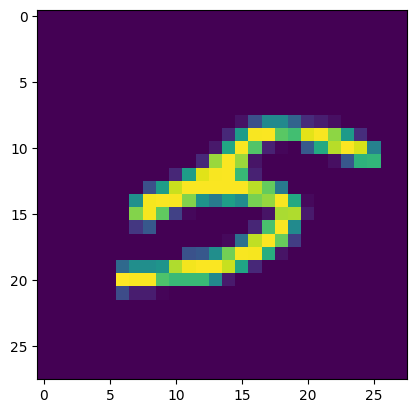

In [116]:
plt.imshow(inference_image)